In [36]:
#1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#2️⃣ Data Handling
df = pd.read_csv("powerconsumption.csv")

print(df.shape)

(52416, 9)


In [38]:
print(df.head())

           Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  01-01-2017 00:00        6.559      73.8      0.083                0.051   
1  01-01-2017 00:10        6.414      74.5      0.083                0.070   
2  01-01-2017 00:20        6.313      74.5      0.080                0.062   
3  01-01-2017 00:30        6.121      75.0      0.083                0.091   
4  01-01-2017 00:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18

In [39]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  str    
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), str(1)
memory usage: 4.4 MB
None


In [40]:
#3️⃣ Datetime Conversion & Indexing
df['Datetime'] = pd.to_datetime(
    df['Datetime'],
    dayfirst=True,
    errors='coerce'
)

df = df.dropna(subset=['Datetime'])
df = df.sort_values('Datetime')
df.set_index('Datetime', inplace=True)

In [41]:
#4️⃣ Basic EDA

In [42]:
#Missing Values
print(df.isnull().sum())

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [43]:
#Statistical Summary
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000
mean,18.825884,69.109394,1.729066,174.976518,78.654503,32086.712491,20747.253198,17781.417367
std,6.008565,15.458971,2.278698,254.271320,125.980990,7053.231363,5181.114114,6277.698017
min,4.212000,12.270000,0.050000,0.007000,0.026000,17624.334600,8560.081466,5935.174070
25%,14.440000,59.467500,0.075000,0.066000,0.122000,26165.609202,16726.715178,13416.656530
50%,19.185000,71.100000,0.085000,4.532500,4.002000,31935.028565,20533.197560,16387.995200
75%,23.230000,82.500000,4.910000,303.100000,110.425000,36950.463580,24266.944515,21732.893850
max,37.260000,94.000000,4.984000,974.000000,909.000000,52204.395120,36482.787750,41415.423200


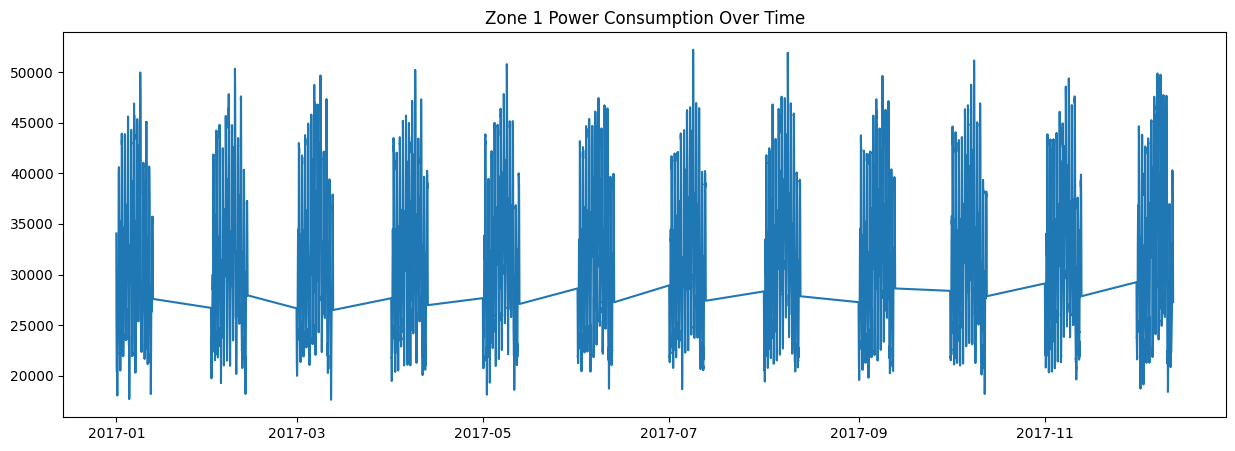

In [44]:
#5️⃣ Time Series Visualization
plt.figure(figsize=(15,5))
plt.plot(df['PowerConsumption_Zone1'])
plt.title("Zone 1 Power Consumption Over Time")
plt.show()

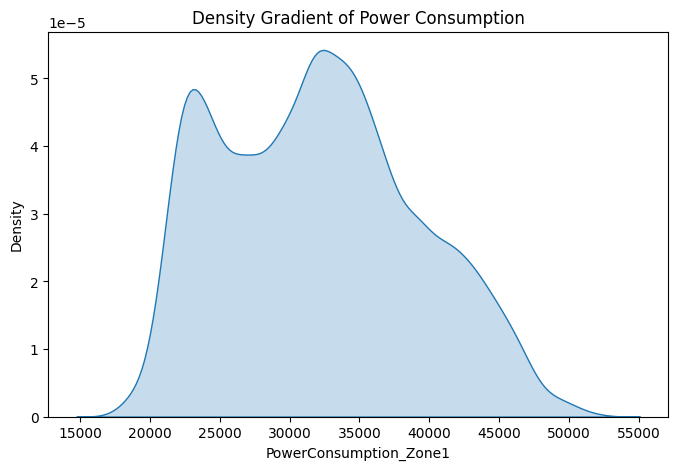

In [45]:
#6️⃣ Density Gradient Graph
plt.figure(figsize=(8,5))
sns.kdeplot(df['PowerConsumption_Zone1'], fill=True)
plt.title("Density Gradient of Power Consumption")
plt.show()

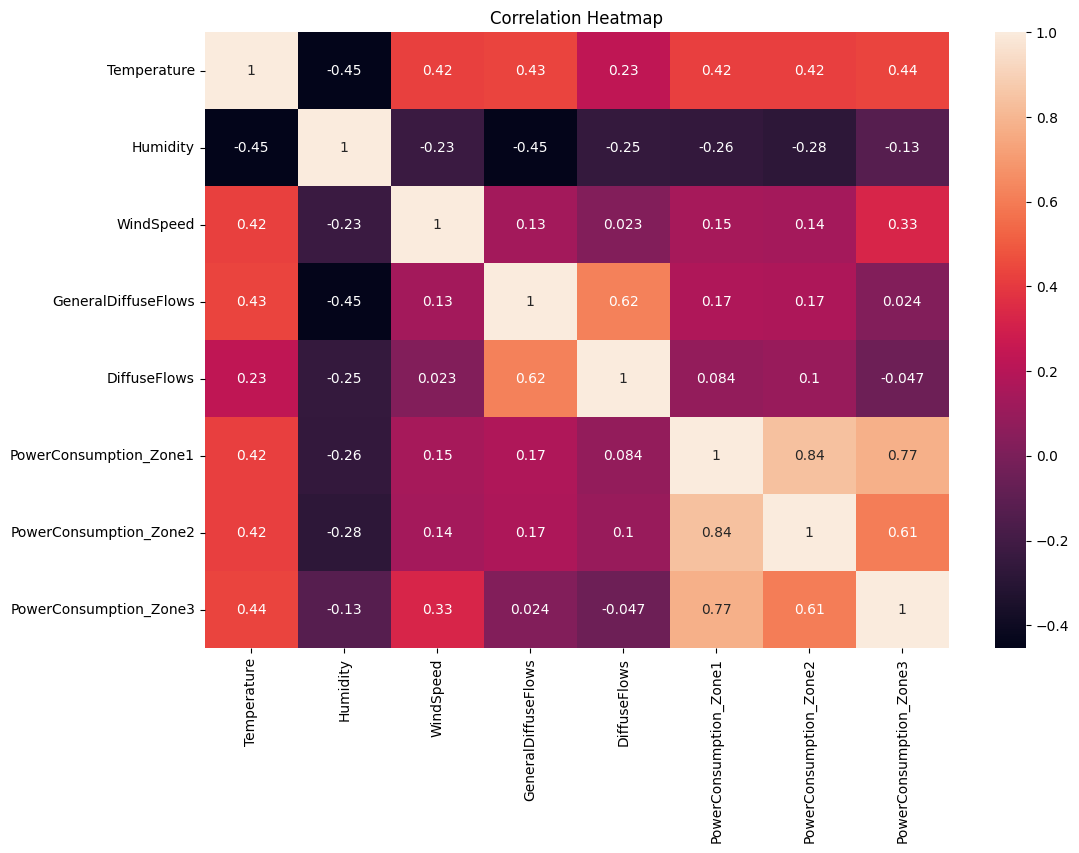

In [46]:
#7️⃣ Correlation Heatmap
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [47]:
print(df.columns)

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='str')


In [49]:
#8️⃣ Stationarity Check (ADF Test)
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['PowerConsumption_Zone1'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -22.351613680717115
p-value: 0.0


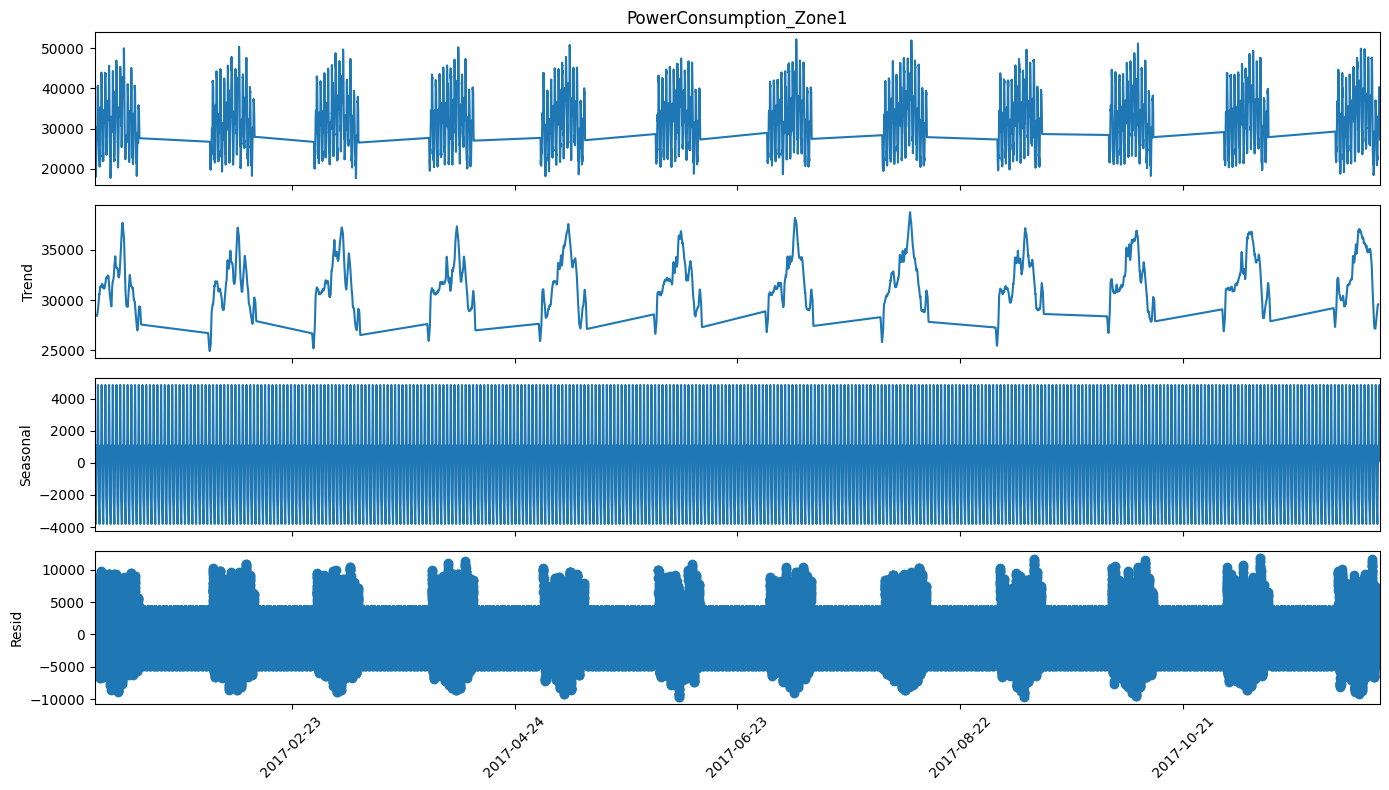

In [50]:
#9️⃣ Seasonal Decomposition
#9️⃣ Seasonal Decomposition (CORRECT FIX)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure index is datetime
df.index = pd.to_datetime(df.index)

# Ensure regular frequency (10-minute interval dataset)
df = df.asfreq('10min')

# Fill missing values safely
df['PowerConsumption_Zone1'] = df['PowerConsumption_Zone1'].interpolate()

# Perform decomposition
decomposition = seasonal_decompose(
    df['PowerConsumption_Zone1'],
    model='additive',
    period=144
)

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 8)

for ax in fig.axes:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [51]:
#🔟 Outlier Detection (IQR)
Q1 = df['PowerConsumption_Zone1'].quantile(0.25)
Q3 = df['PowerConsumption_Zone1'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['PowerConsumption_Zone1'] < Q1 - 1.5*IQR) |
    (df['PowerConsumption_Zone1'] > Q3 + 1.5*IQR)
]

print("Number of Outliers:", len(outliers))

Number of Outliers: 10831


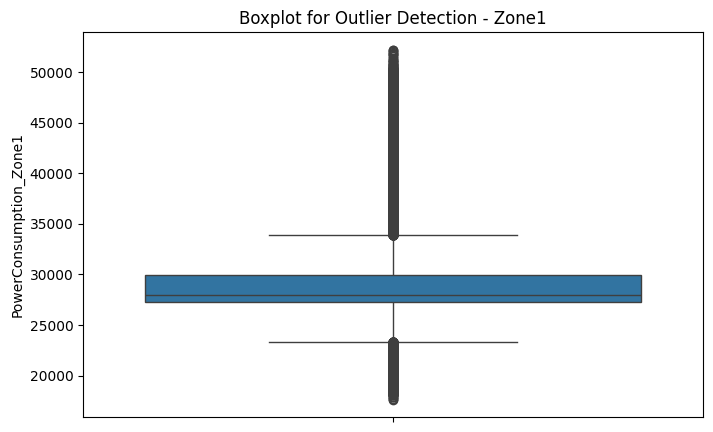

In [52]:
#✅ 1️⃣ Boxplot (Best for IQR Outlier Visualization)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(y=df['PowerConsumption_Zone1'])
plt.title("Boxplot for Outlier Detection - Zone1")
plt.show()

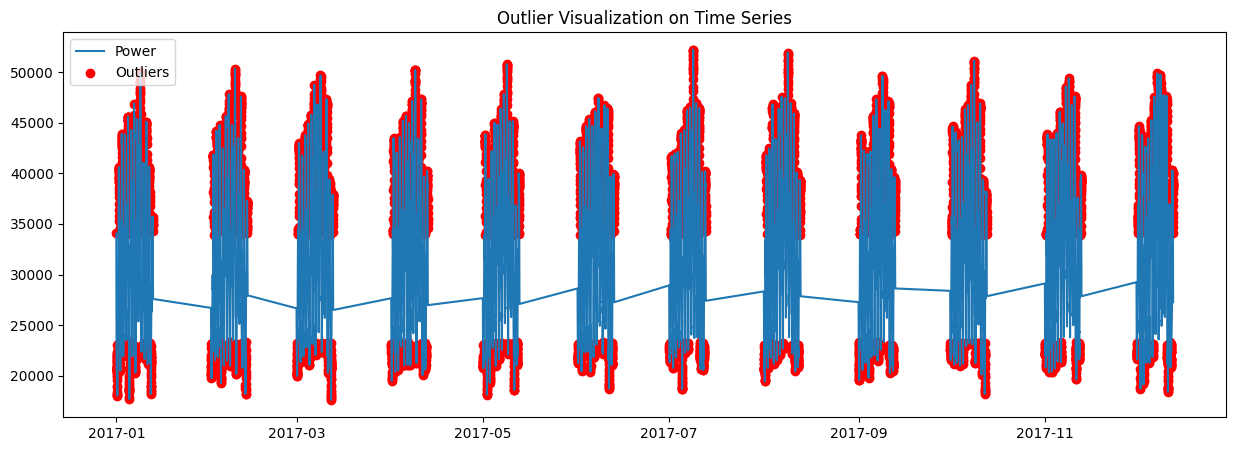

In [53]:
#📈 2️⃣ Time Series Outlier Visualization
plt.figure(figsize=(15,5))
plt.plot(df.index, df['PowerConsumption_Zone1'], label='Power')
plt.scatter(outliers.index, outliers['PowerConsumption_Zone1'], 
            color='red', label='Outliers')

plt.legend()
plt.title("Outlier Visualization on Time Series")
plt.show()

In [54]:
#📊 3️⃣ Z-Score Based Outlier Detection (Stronger Check)
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['PowerConsumption_Zone1']))
z_outliers = df[z_scores > 3]

print("Z-score Outliers:", len(z_outliers))

Z-score Outliers: 938


In [55]:
#1️⃣1️⃣ Feature Engineering
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday

In [56]:
#Cyclical Encoding
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

In [57]:
#Lag Features
df['lag_1'] = df['PowerConsumption_Zone1'].shift(1)
df['lag_6'] = df['PowerConsumption_Zone1'].shift(6)
df['lag_24'] = df['PowerConsumption_Zone1'].shift(24)

In [58]:
#Rolling Features
df['rolling_mean_6'] = df['PowerConsumption_Zone1'].shift(1).rolling(6).mean()
df['rolling_std_6'] = df['PowerConsumption_Zone1'].shift(1).rolling(6).std()

In [59]:
#Drop NA
df.dropna(inplace=True)

In [60]:
#1️⃣2️⃣ Data Pre-Processing
target = 'PowerConsumption_Zone1'

X = df.drop(columns=[target])
y = df[target]

In [61]:
#Chronological Split
split = int(len(df) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [62]:
#MODEL 1 — RANDOM FOREST


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [65]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MAPE:", mape)
    print("R2:", r2)

evaluate_model(y_test, rf_pred)

RMSE: 408.0081402842944
MAE: 248.06379589849485
MAPE: 0.7860251062322438
R2: 0.9967625000587259


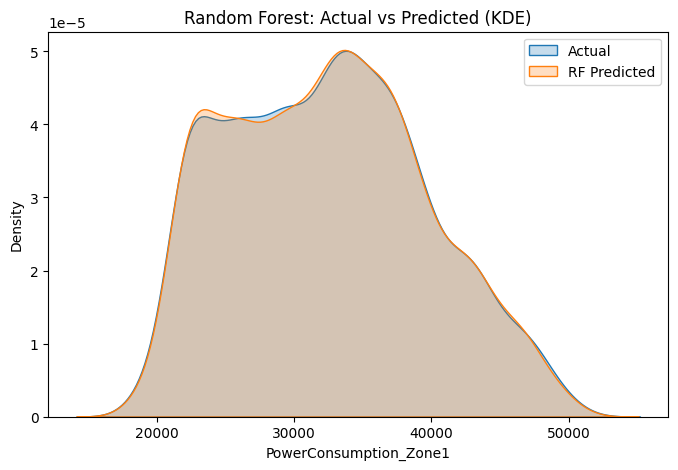

In [66]:
plt.figure(figsize=(8,5))

sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(rf_pred, label="RF Predicted", fill=True)

plt.title("Random Forest: Actual vs Predicted (KDE)")
plt.legend()
plt.show()

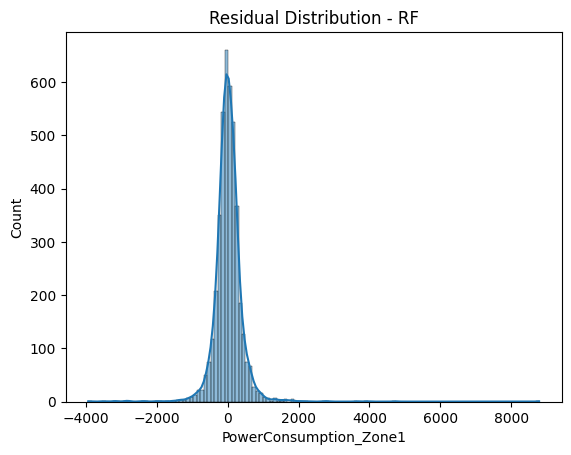

In [67]:
#RF Residual Analysis
residuals = y_test - rf_pred

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution - RF")
plt.show()

In [68]:
#🚀 MODEL 2 — XGBOOST

In [69]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

In [70]:
evaluate_model(y_test, xgb_pred)

RMSE: 350.64888822688096
MAE: 241.78185211606922
MAPE: 0.7665406673207881
R2: 0.9976087937018645


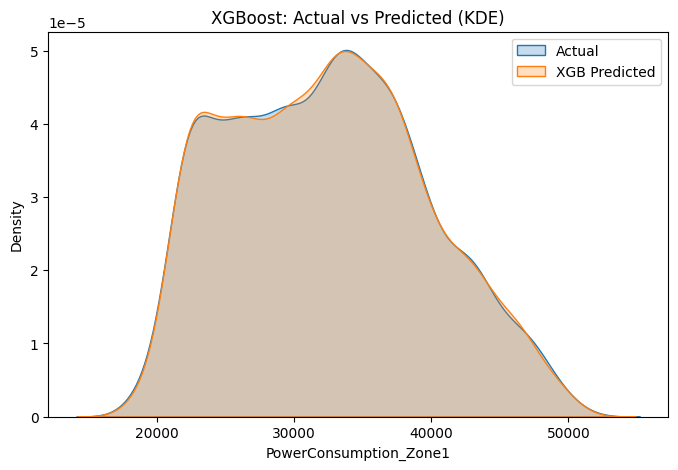

In [72]:
plt.figure(figsize=(8,5))

sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(xgb_pred, label="XGB Predicted", fill=True)

plt.title("XGBoost: Actual vs Predicted (KDE)")
plt.legend()
plt.show()

In [73]:
#🧠 COMPLETE LSTM BUILD

In [74]:
#1️⃣ Define Target
target = 'PowerConsumption_Zone1'

In [75]:
#2️⃣ Chronological Train-Test Split (Before Scaling)
split = int(len(df) * 0.8)

train_df = df.iloc[:split]
test_df = df.iloc[split:]

In [76]:
#3️⃣ Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

In [77]:
#4️⃣ Create Sequences Function
import numpy as np

def create_sequences(data, target_index, window=24):
    X, y = [], []
    
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, target_index])
    
    return np.array(X), np.array(y)


In [45]:
#5️⃣ Create Train and Test Sequences
target_index = df.columns.get_loc(target)

X_train_seq, y_train_seq = create_sequences(train_scaled, target_index)
X_test_seq, y_test_seq = create_sequences(test_scaled, target_index)

print("Train Shape:", X_train_seq.shape)
print("Test Shape:", X_test_seq.shape)

Train Shape: (16545, 24, 19)
Test Shape: (4119, 24, 19)


In [46]:
#6️⃣ Build Proper LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

C:\Users\Jagriti Arora\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 64)              │          21,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,953 (132.63 KB)

 Trainable params: 33,953 (132.63 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#7️⃣ Add Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [48]:
#8️⃣ Train Model
history = model.fit(
    X_train_seq,
    y_train_seq,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0135 - val_loss: 0.0030
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0026 - val_loss: 8.9043e-04
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0019 - val_loss: 7.1235e-04
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0017 - val_loss: 6.0429e-04
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0015 - val_loss: 6.1821e-04
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0014 - val_loss: 5.0154e-04
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0013 - val_loss: 4.8604e-04
Epoch

In [49]:
#9️⃣ Predict
lstm_pred_scaled = model.predict(X_test_seq)

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [50]:
#🔟 Inverse Scale Predictions
# Create dummy array to inverse transform
dummy = np.zeros((len(lstm_pred_scaled), train_scaled.shape[1]))
dummy[:, target_index] = lstm_pred_scaled.flatten()

lstm_pred = scaler.inverse_transform(dummy)[:, target_index]

In [51]:
#1️⃣1️⃣ Evaluate Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Align true values (because of window shift)
y_true = test_df[target].values[24:]

rmse = np.sqrt(mean_squared_error(y_true, lstm_pred))
mae = mean_absolute_error(y_true, lstm_pred)
r2 = r2_score(y_true, lstm_pred)

print("LSTM RMSE:", rmse)
print("LSTM MAE:", mae)
print("LSTM R2:", r2)

LSTM RMSE: 449.3579387706234
LSTM MAE: 268.50113472663924
LSTM R2: 0.9960793406454951


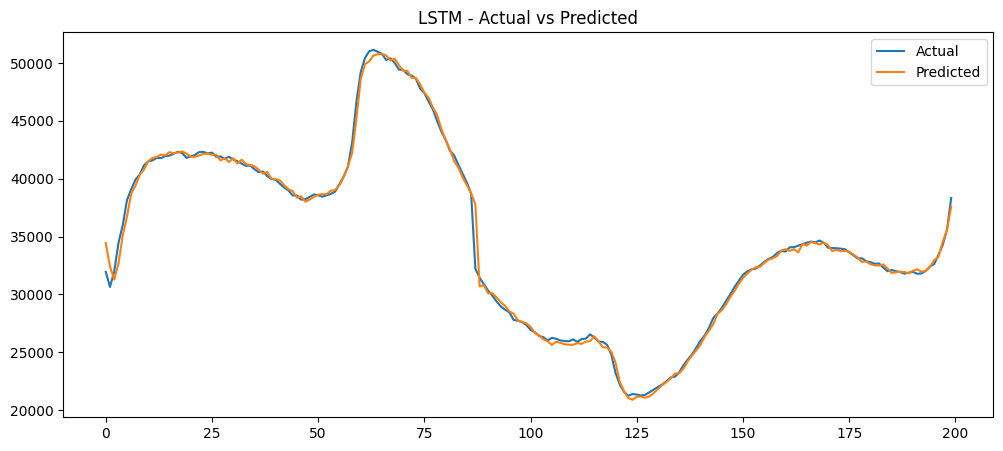

In [52]:
#1️⃣2️⃣ Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_true[:200], label="Actual")
plt.plot(lstm_pred[:200], label="Predicted")
plt.legend()
plt.title("LSTM - Actual vs Predicted")
plt.show()

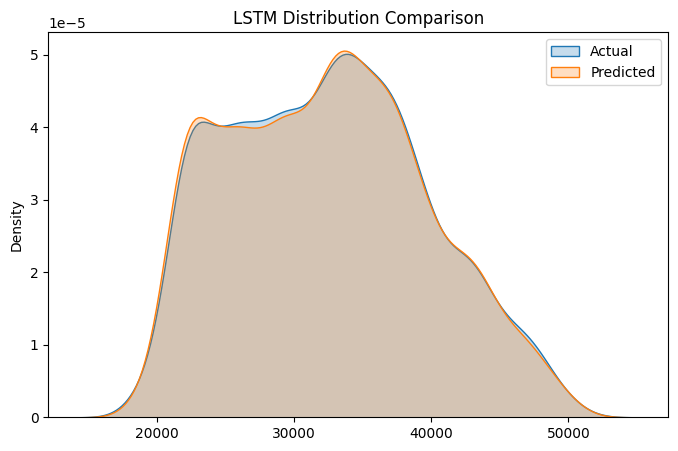

In [53]:
#1️⃣3️⃣ KDE Plot
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(y_true, label="Actual", fill=True)
sns.kdeplot(lstm_pred, label="Predicted", fill=True)
plt.legend()
plt.title("LSTM Distribution Comparison")
plt.show()

In [54]:
#🧠 LSTM Feature Importance (Permutation Method)
from sklearn.metrics import mean_squared_error
import numpy as np

baseline_pred = model.predict(X_test_seq)

# Inverse scaling
dummy = np.zeros((len(baseline_pred), train_scaled.shape[1]))
dummy[:, target_index] = baseline_pred.flatten()

baseline_pred_inv = scaler.inverse_transform(dummy)[:, target_index]

y_true = test_df[target].values[24:]

baseline_rmse = np.sqrt(mean_squared_error(y_true, baseline_pred_inv))

print("Baseline RMSE:", baseline_rmse)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Baseline RMSE: 449.3579387706234


In [55]:
feature_importance = {}

for i, col in enumerate(df.columns):

    X_test_permuted = X_test_seq.copy()

    # Shuffle one feature across all timesteps
    np.random.shuffle(X_test_permuted[:, :, i])

    perm_pred = model.predict(X_test_permuted)

    dummy_perm = np.zeros((len(perm_pred), train_scaled.shape[1]))
    dummy_perm[:, target_index] = perm_pred.flatten()

    perm_pred_inv = scaler.inverse_transform(dummy_perm)[:, target_index]

    perm_rmse = np.sqrt(mean_squared_error(y_true, perm_pred_inv))

    importance = perm_rmse - baseline_rmse
    feature_importance[col] = importance

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
